import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

load data

In [2]:
raw_data=pd.read_csv("Country-data.csv")
data=raw_data.copy()

In [3]:
#view data
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data.shape

(167, 10)

In [5]:
#check null values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

plot the data

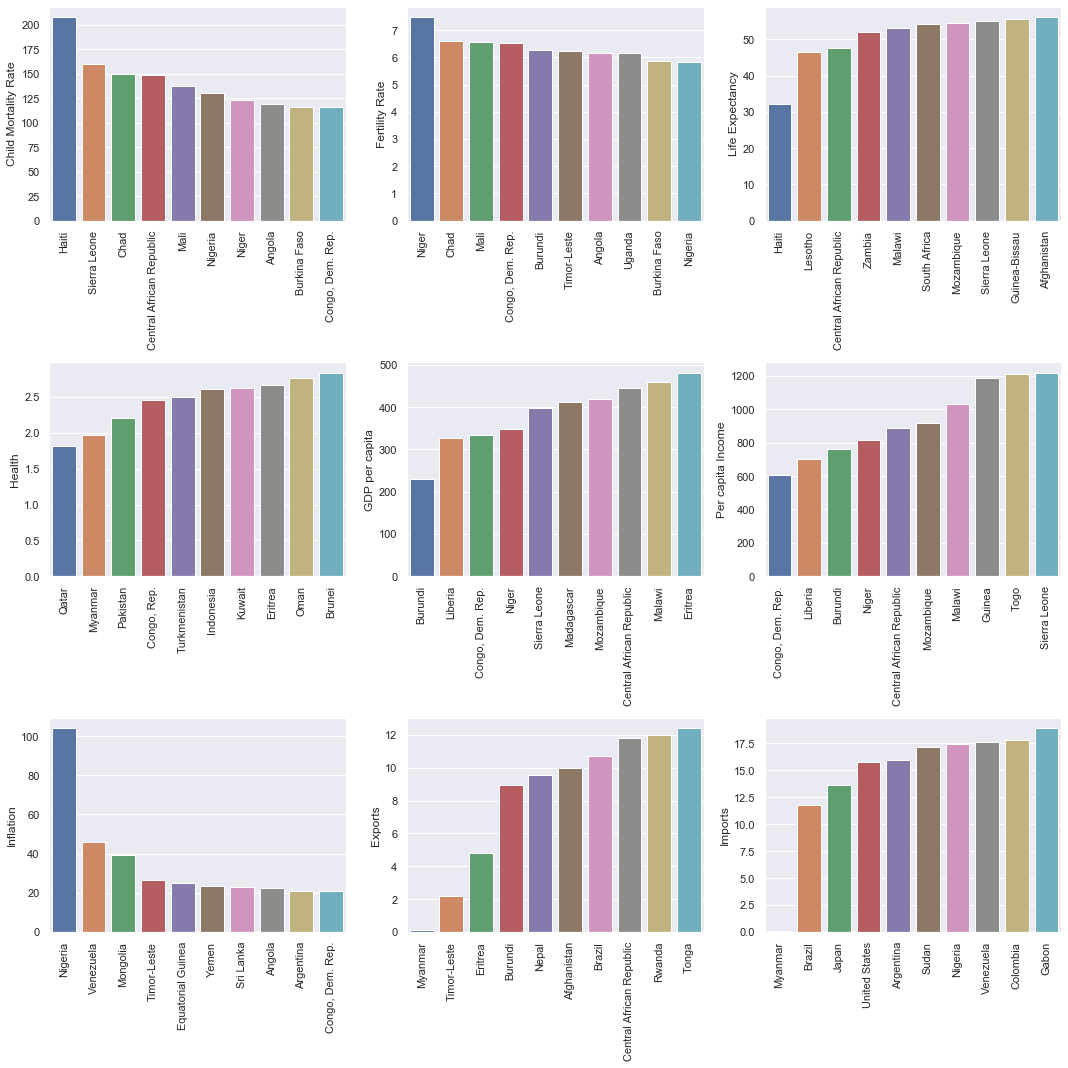

In [6]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate: visualize countries from highest children death under 5 years

top10_child_mort = data[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: visualize countries from highest fertility
top10_total_fer = data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Inflation: visualize countries from top inflation

top10_inflation = data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')

# Life Expectancy :visualize countries from lowest life expectancy

bottom10_life_expec = data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health: visualize countries from lowest health 

bottom10_health = data[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP: : visualize countries from lowest GDP

bottom10_gdpp = data[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Income: visualize countries from lowest income 

bottom10_income = data[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Exports: visualize countries from lowest exports 

bottom10_exports = data[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: visualize countries from lowest imports 

bottom10_imports = data[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

#the following lines to rotate countries names to be readable
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()

outliers analysis

In [7]:
#this line describes the mean, min, standard deviation and max of each feature to see if there is outliers
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


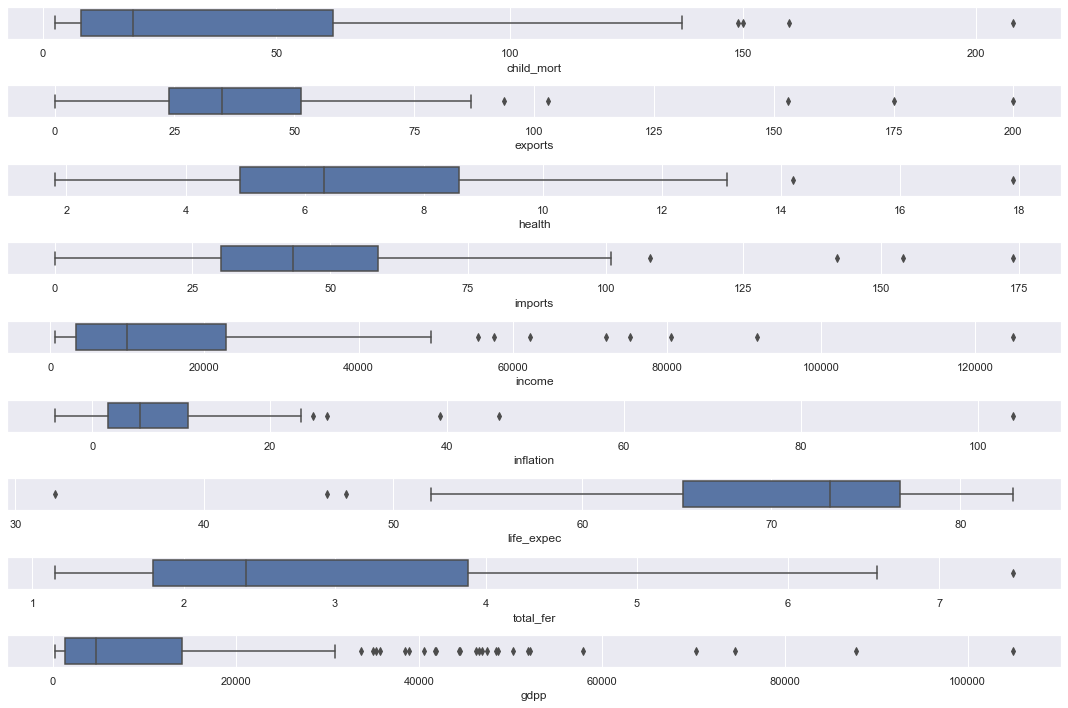

In [8]:
#plot boxplot to visualize outliers in data
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
fig, axs = plt.subplots(9,1, figsize = (15,10))
for i,val in enumerate(varlist):
    sns.boxplot(data[val], ax = axs[i])

plt.tight_layout()

deal with outliers

In [9]:
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for x in varlist:
    percentiles = data[x].quantile([0.05,0.95]).values
    data[x][data[x] <= percentiles[0]] = percentiles[0]
    data[x][data[x] >= percentiles[1]] = percentiles[1]


c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\soha\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

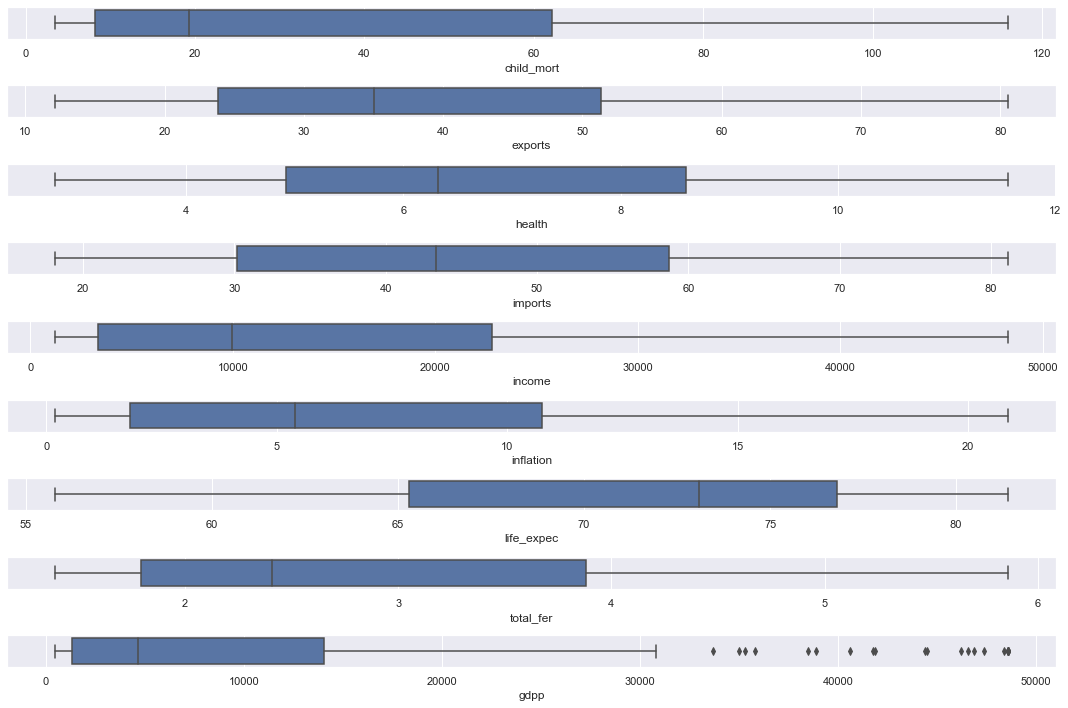

In [10]:
#plot boxplot to visualize data after removing outliers
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
fig, axs = plt.subplots(9,1, figsize = (15,10))
for i,val in enumerate(varlist):
    sns.boxplot(data[val], ax = axs[i])

plt.tight_layout()

Scale the data

In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data[varlist] = scaler.fit_transform(data[varlist])

PCA on data

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
# feature variables wihtout country column
X = data.drop(['country'],axis=1)

# response variable which is country
y = data['country']
#PCA on the train data
pca_comp = pca.fit_transform(X)
# Save pca components to a DataFrame
PCA_components = pd.DataFrame(pca_comp)

In [13]:
#display pca components
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

In [14]:
#display variance ratio to calculate which components have got more than 80 percentage of information and use them in clustering
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

([<matplotlib.axis.XTick at 0x23c3c767848>,
 <a list of 9 Text xticklabel objects>)

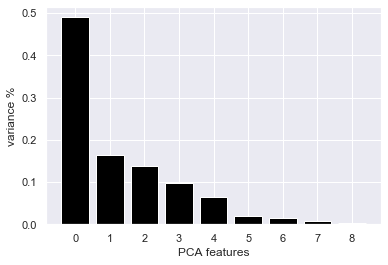

In [15]:
# Plot the explained variances
#plot shows that first 4 pca components have got 87% of information
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Kmeans clustering

In [16]:
#kmeans clustering will use the five first pca components in clustering algorithm
PCA_components.iloc[:,:4]

,0,1,2,3
0,-3.276710,0.384825,-1.061693,0.915760
1,0.482592,0.138345,-0.315498,-1.429981
2,-0.447438,0.492021,1.777013,-0.669628
3,-3.356983,-1.158613,2.059427,1.732923
4,1.244934,-0.702870,-0.223665,-0.743702
...,...,...,...,...
162,-0.917040,-1.015583,-0.339947,-0.537898
163,-0.235585,1.570762,2.195163,-0.400070
164,0.348252,-2.472248,0.338116,-0.600131
165,-2.275051,0.479108,1.398911,0.243205


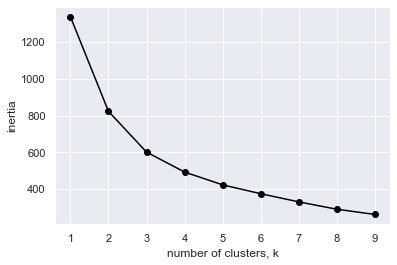

In [17]:
#apply kmeans to different number of clusters to get the best number of cluster with less variance
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:4])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [18]:
#elbow graph above shows that best number of clusters is 3
model = KMeans(n_clusters=3)
model.fit(PCA_components.iloc[:,:4])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
#predict the clusters of data after applying first 3 pca as features
kmeans_pred=model.predict(PCA_components.iloc[:,:4])

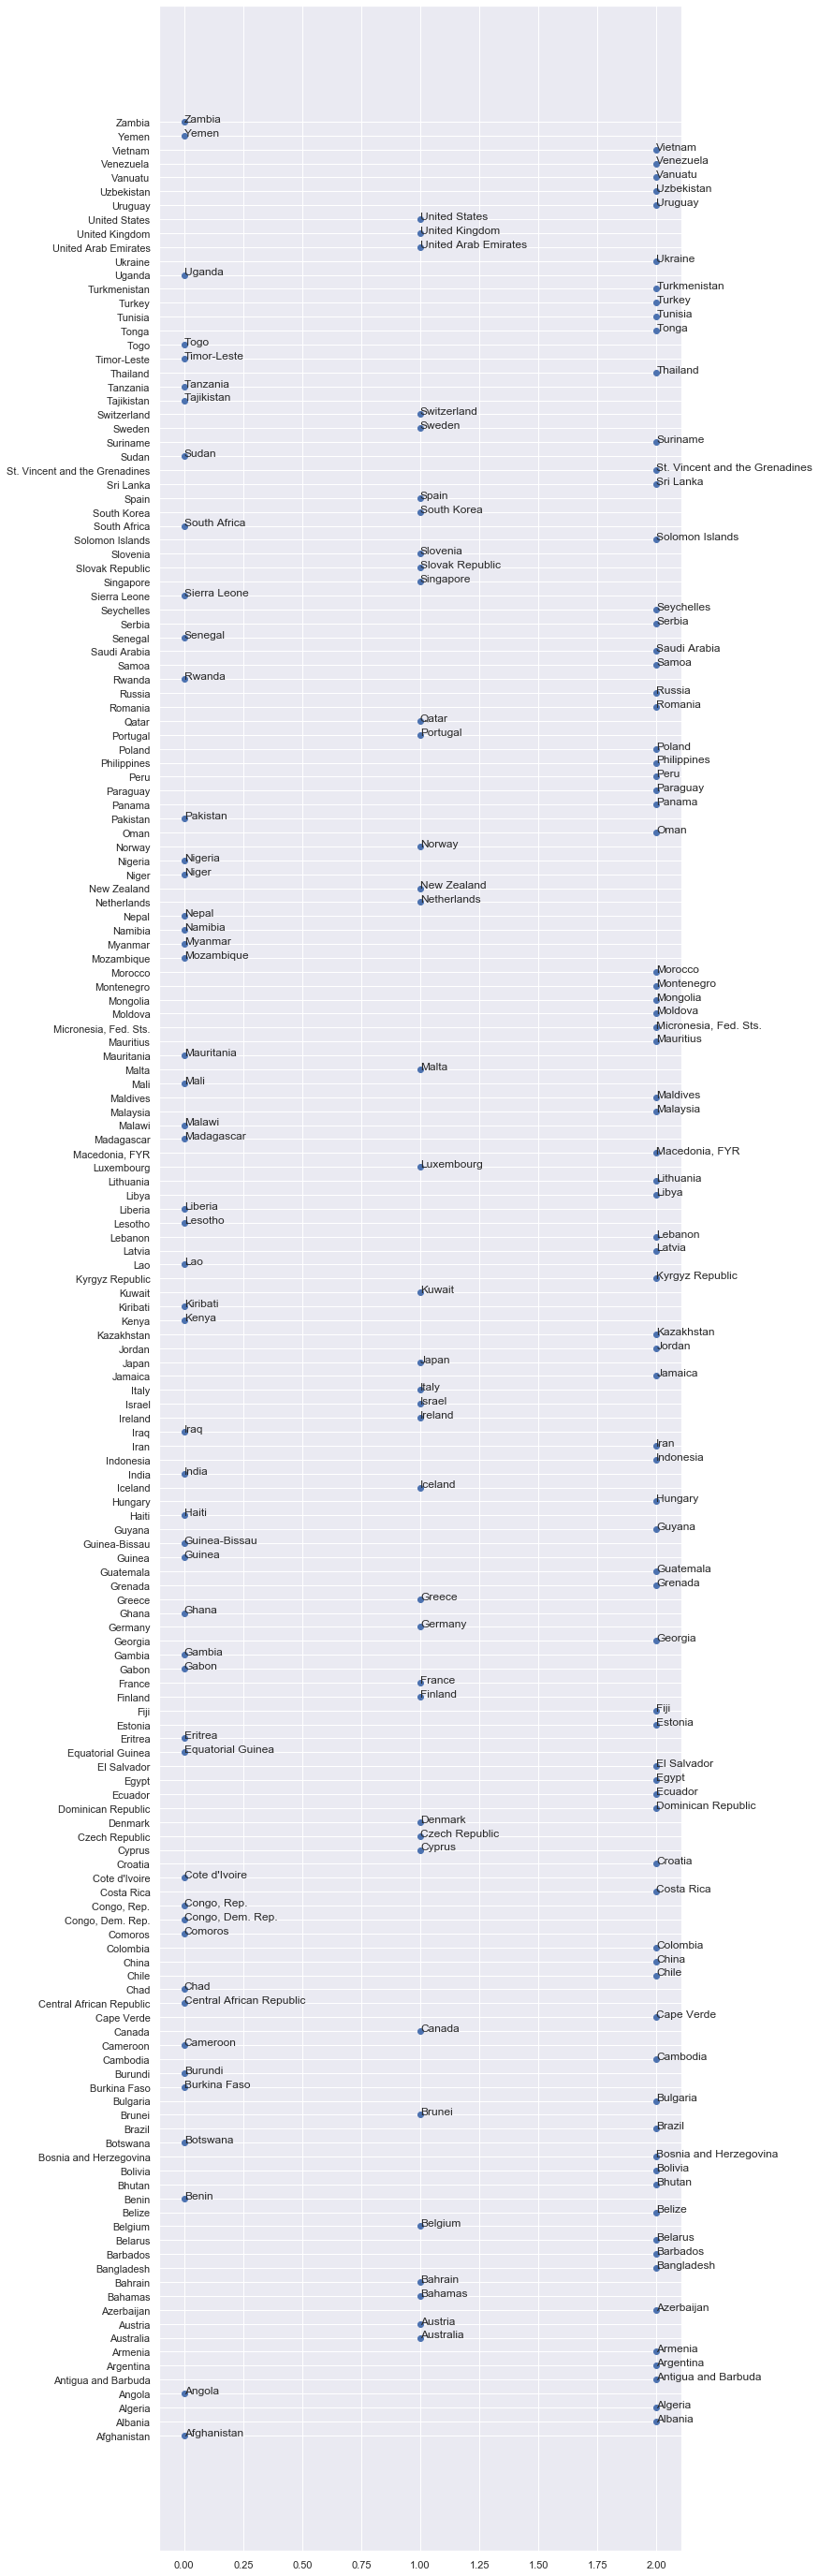

In [20]:
#plot three clusters of countries predicted from kmeans algorithm
fig, ax = plt.subplots(figsize = (10,50))
ax.scatter(kmeans_pred,y)


for i, txt in enumerate(y):
    ax.annotate(txt,(kmeans_pred[i],y[i]))
plt.show()

In [21]:
#implement dataframe to view countries of cluster id =0 resulted from kmeans clustering
df_kmeans=pd.DataFrame({'Country':y,'ClusterID':kmeans_pred})

df_kmeans[df_kmeans['ClusterID']==0].iloc[:,0].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania',
       'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'], dtype=object)

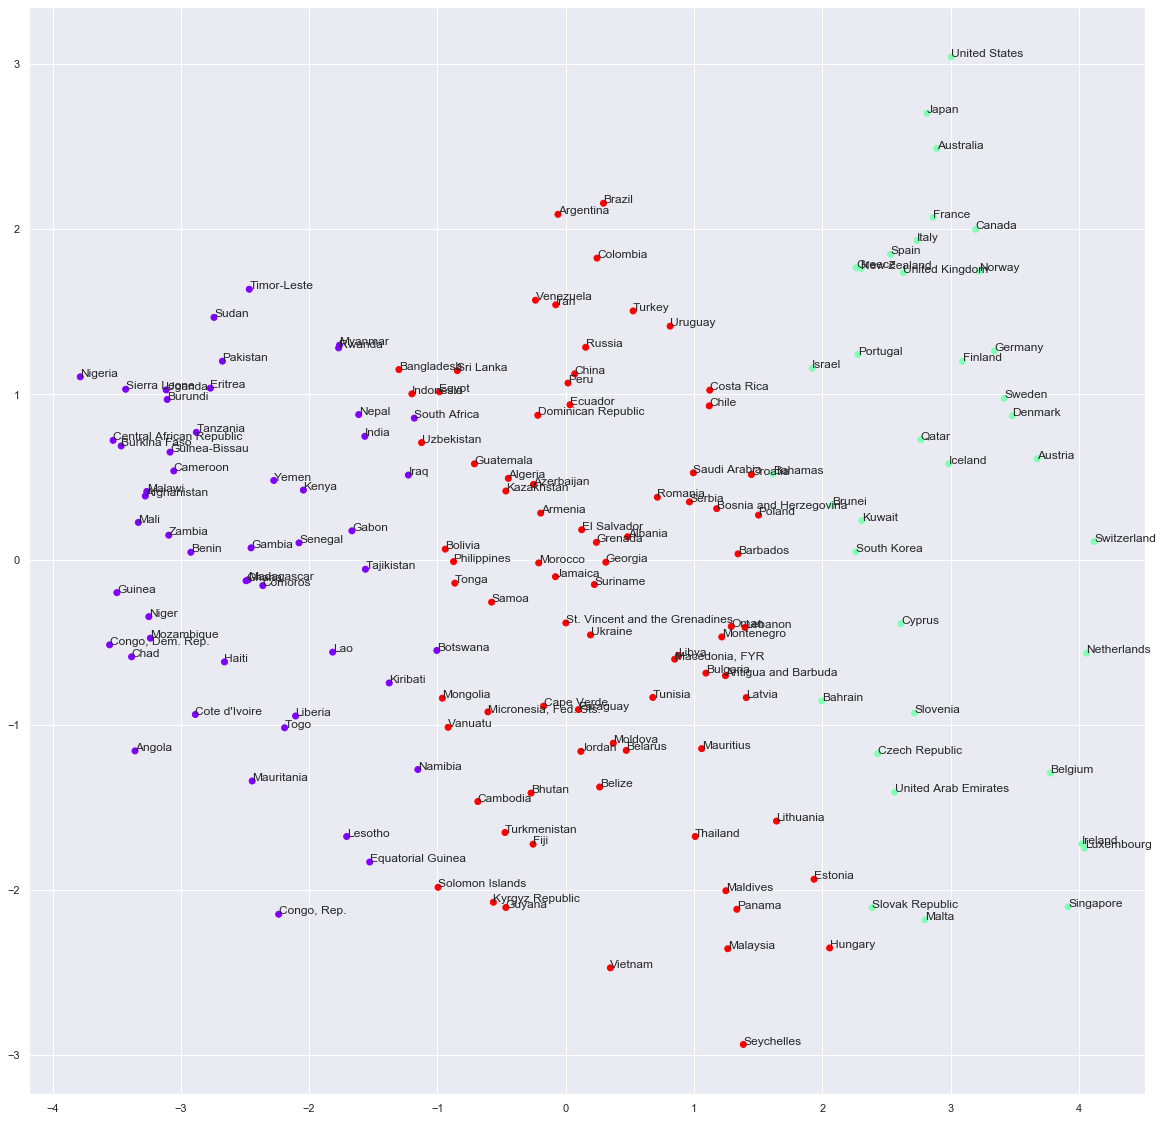

In [22]:
# implement dataframe to PCA components 1 &2 and countries and clusterid
#this dataframe used to plot countries clusters according to kmeans clustering
kmeans_df=pd.DataFrame({'Country':y,'pca1':PCA_components[0],'pca2':PCA_components[1],'ClusterID':kmeans_pred})
fig = plt.figure(figsize = (20,20))

plt.scatter(kmeans_df['pca1'],kmeans_df['pca2'],c=kmeans_df['ClusterID'],cmap="rainbow")
for i, txt in enumerate(y):
    plt.annotate(txt, (kmeans_df.iloc[i]['pca1'],kmeans_df.iloc[i]['pca2']))
plt.show()

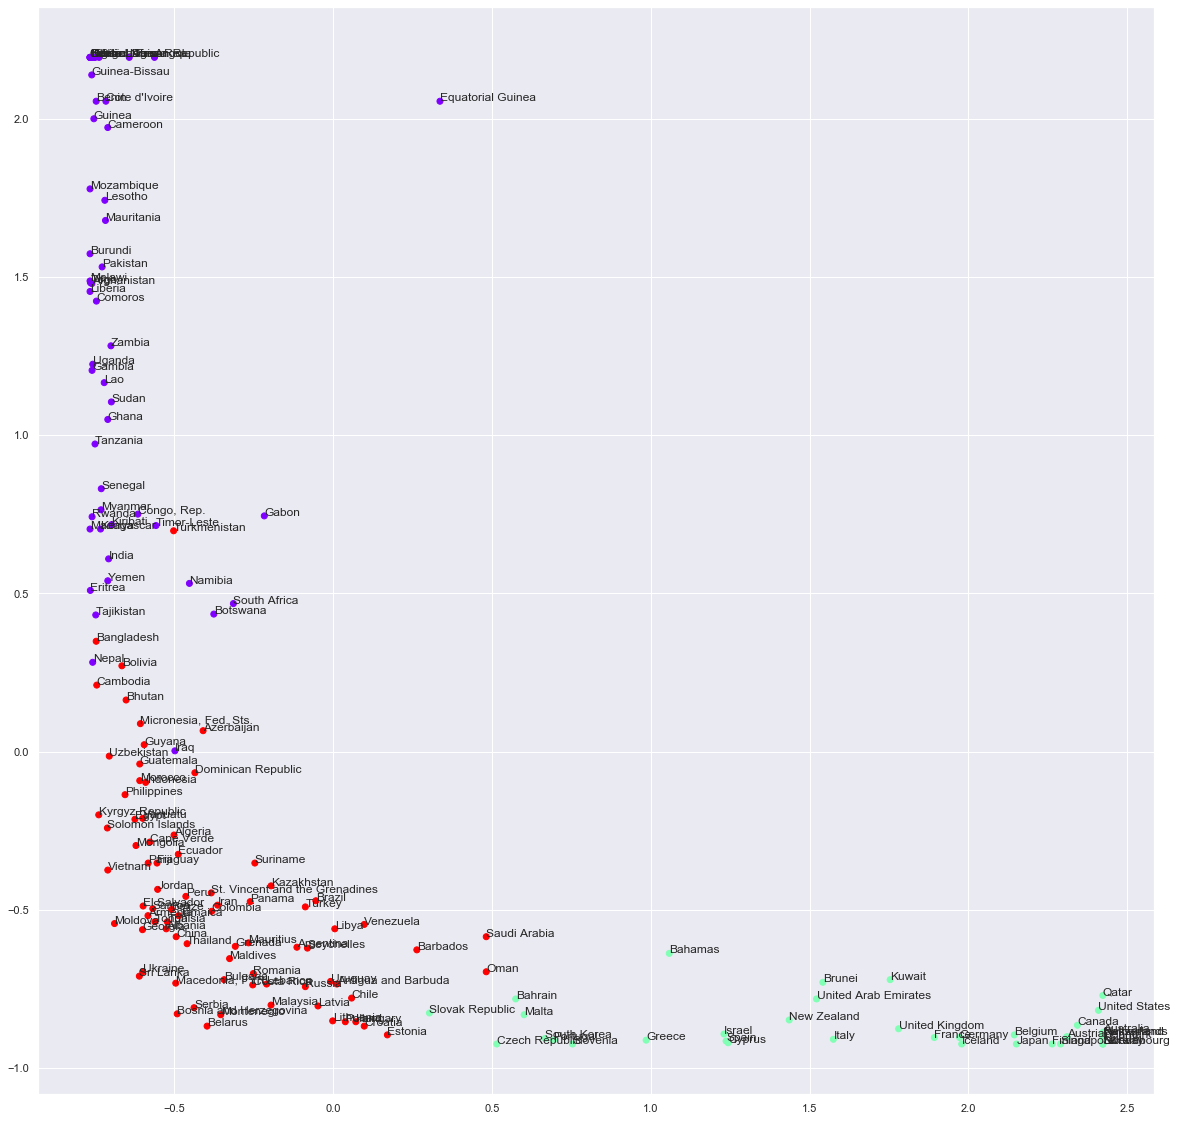

In [23]:
# implement dataframe to gdpp & child_mort and countries and kmeans clusterid
#this dataframe used to plot countries clusters according to kmeans clustering
# visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes
df_vs=pd.DataFrame({'Country':y,'gdpp':data['gdpp'],'child_mort':data['child_mort'],'ClusterID':kmeans_pred})
fig = plt.figure(figsize = (20,20))

plt.scatter(df_vs['gdpp'],df_vs['child_mort'],c=df_vs['ClusterID'],cmap="rainbow")
for i, txt in enumerate(y):
    plt.annotate(txt, (df_vs.iloc[i]['gdpp'],df_vs.iloc[i]['child_mort']))
plt.show()

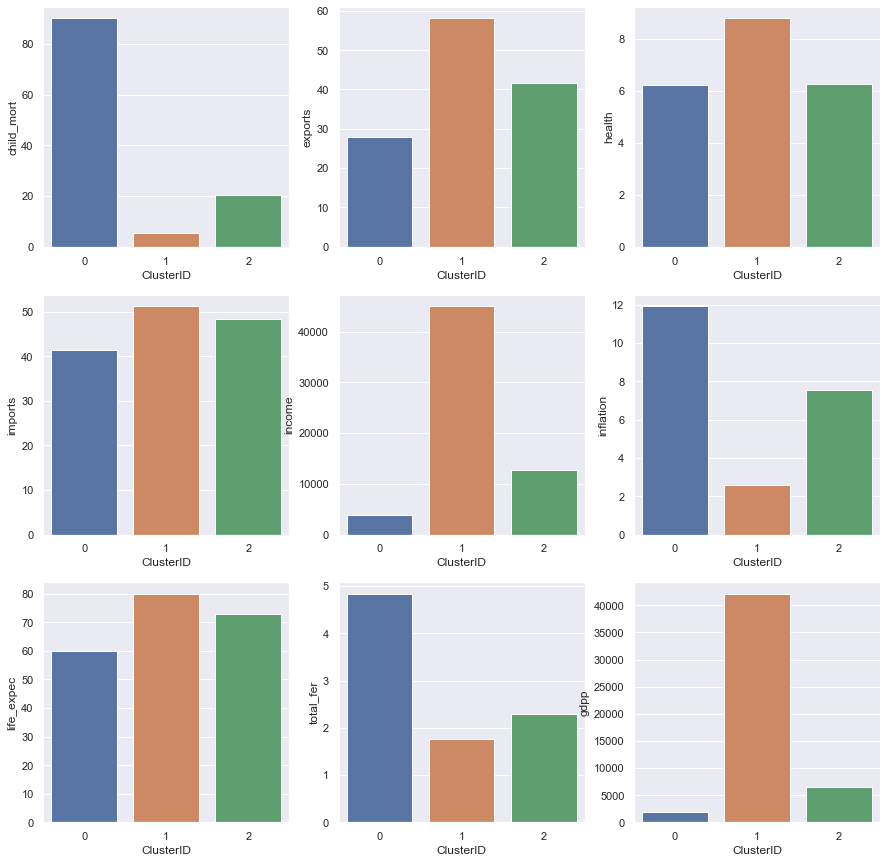

In [24]:
# analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] 
clusters_df=pd.DataFrame({'ClusterID':kmeans_pred})
#concat data to cluster ids predicted from kmeans
all_data=pd.concat([raw_data,clusters_df],axis=1)
#drop country column
all_data=all_data.drop('country',axis=1)
#compute the mean of all columns group by clusterid
all_data=all_data.groupby('ClusterID').mean()
#form a data frame of cluster ids 
groups_df=pd.DataFrame({'ClusterID':list(all_data.groupby('ClusterID').groups.keys())})
#concat dataframe of groups ids and means of columns
graph_df=pd.concat([groups_df,all_data],axis=1)
#plot each attribute with respect to each cluster
fig, axs = plt.subplots(3,3,figsize = (15,15))
i=0
j=0
for (col_name, col_val) in graph_df.iteritems():
    if(col_name !="ClusterID"):
        plt1 = sns.barplot(x='ClusterID', y=col_name, data= graph_df, ax = axs[i,j])
        plt1.set(xlabel = 'ClusterID', ylabel= col_name)
        if(j==2):
            i=i+1
            j=0
        else:
            j=j+1
        

hierarchical clustering

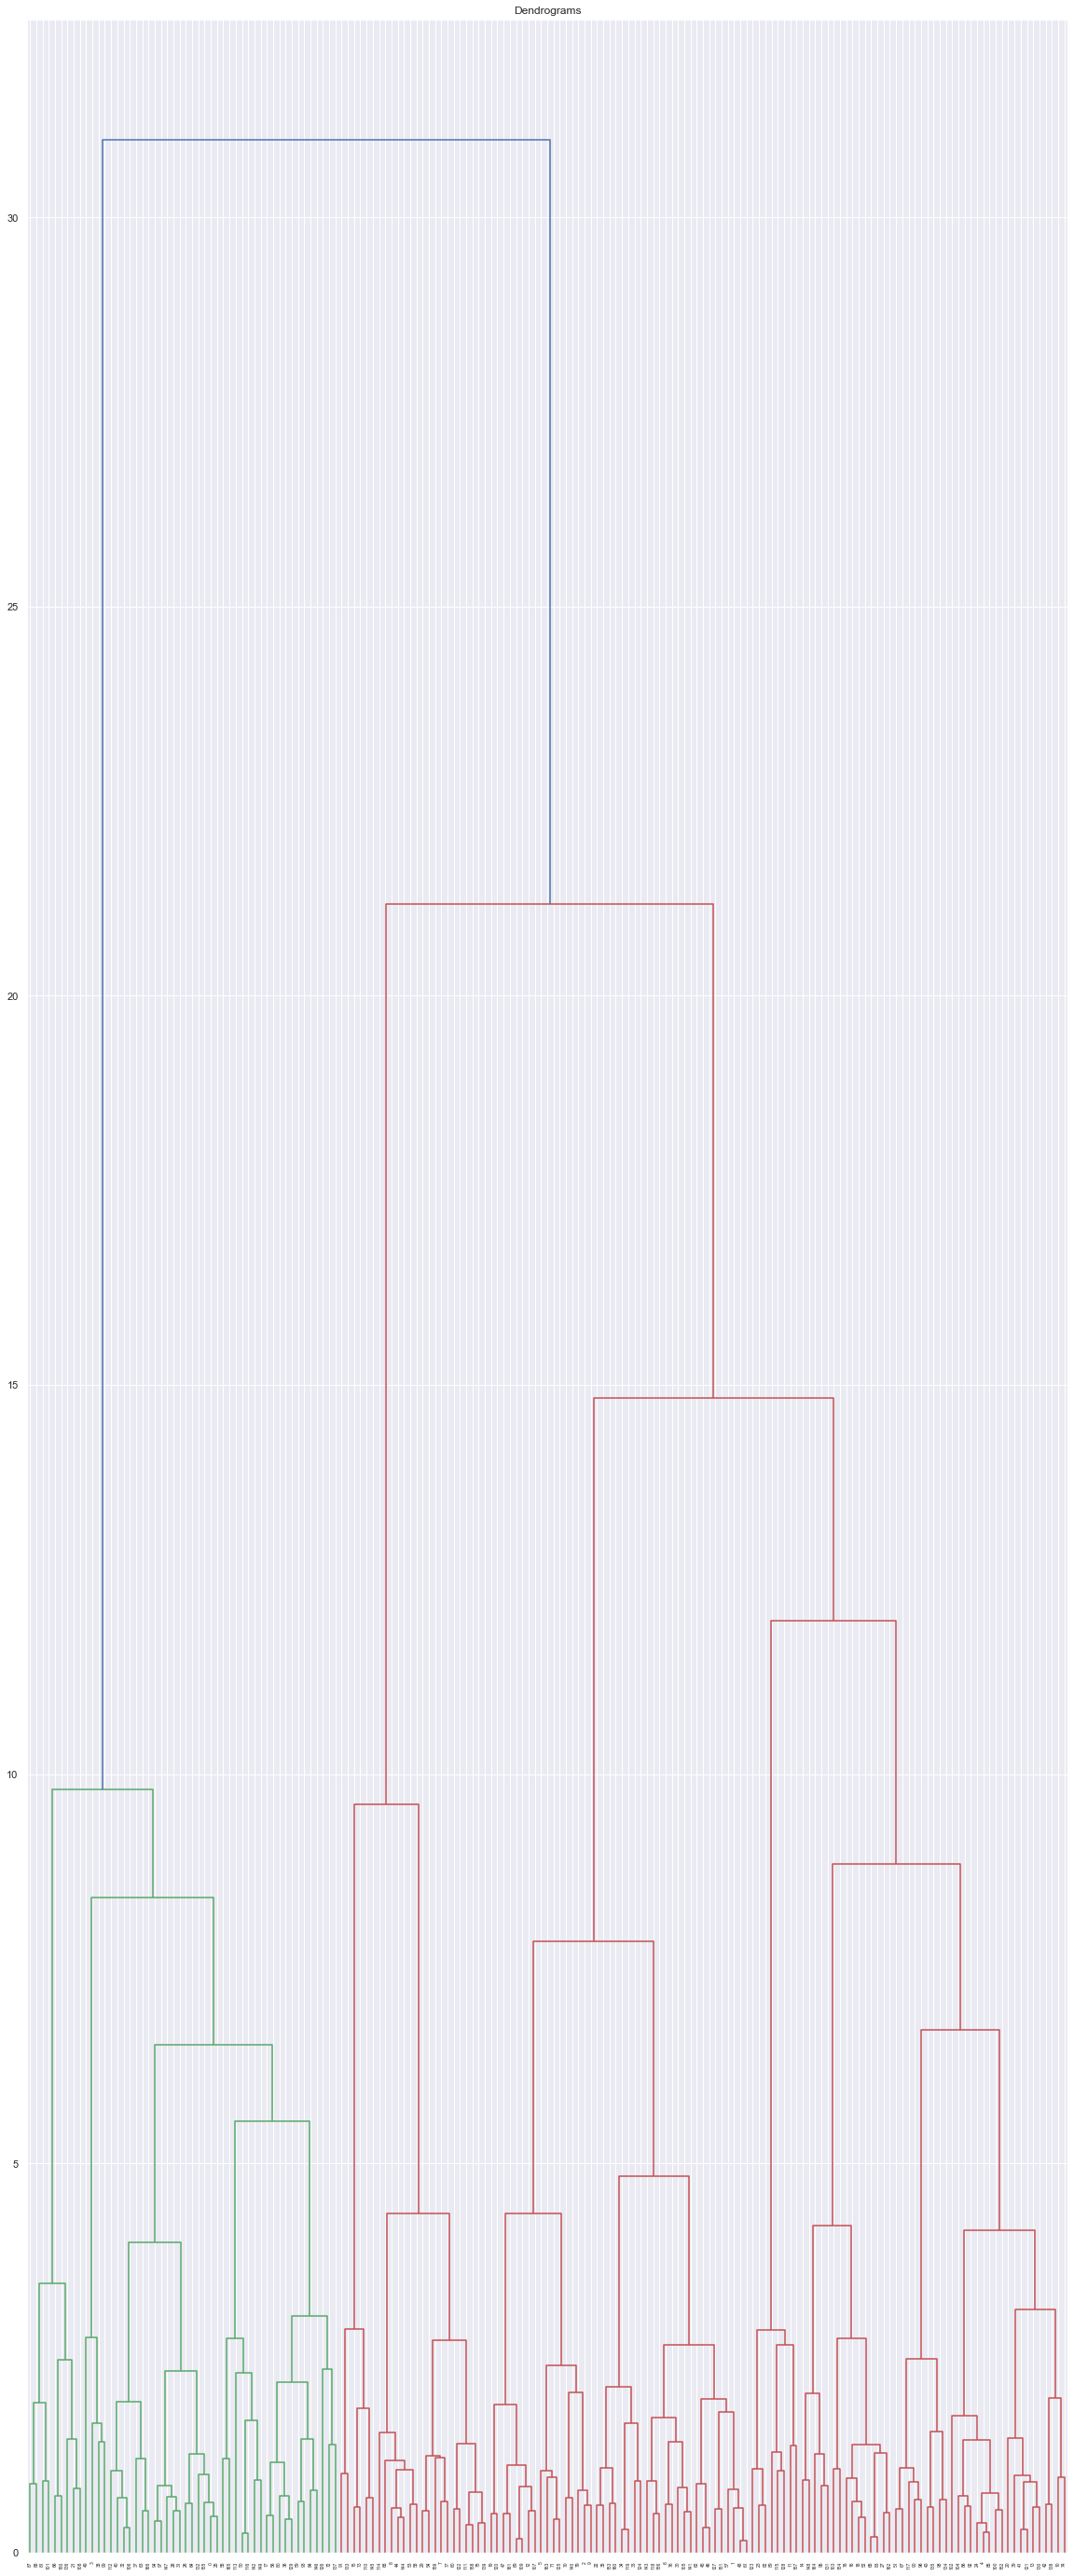

In [25]:
import scipy.cluster.hierarchy as hc
plt.figure(figsize=(20, 50))  
plt.title("Dendrograms")  
dend = hc.dendrogram(hc.linkage(PCA_components.iloc[:,:4], method='ward'))

In [26]:
#dendrogram graph above shows that best number of clusters is 5
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
pred_hier=cluster.fit_predict(PCA_components.iloc[:,:4])

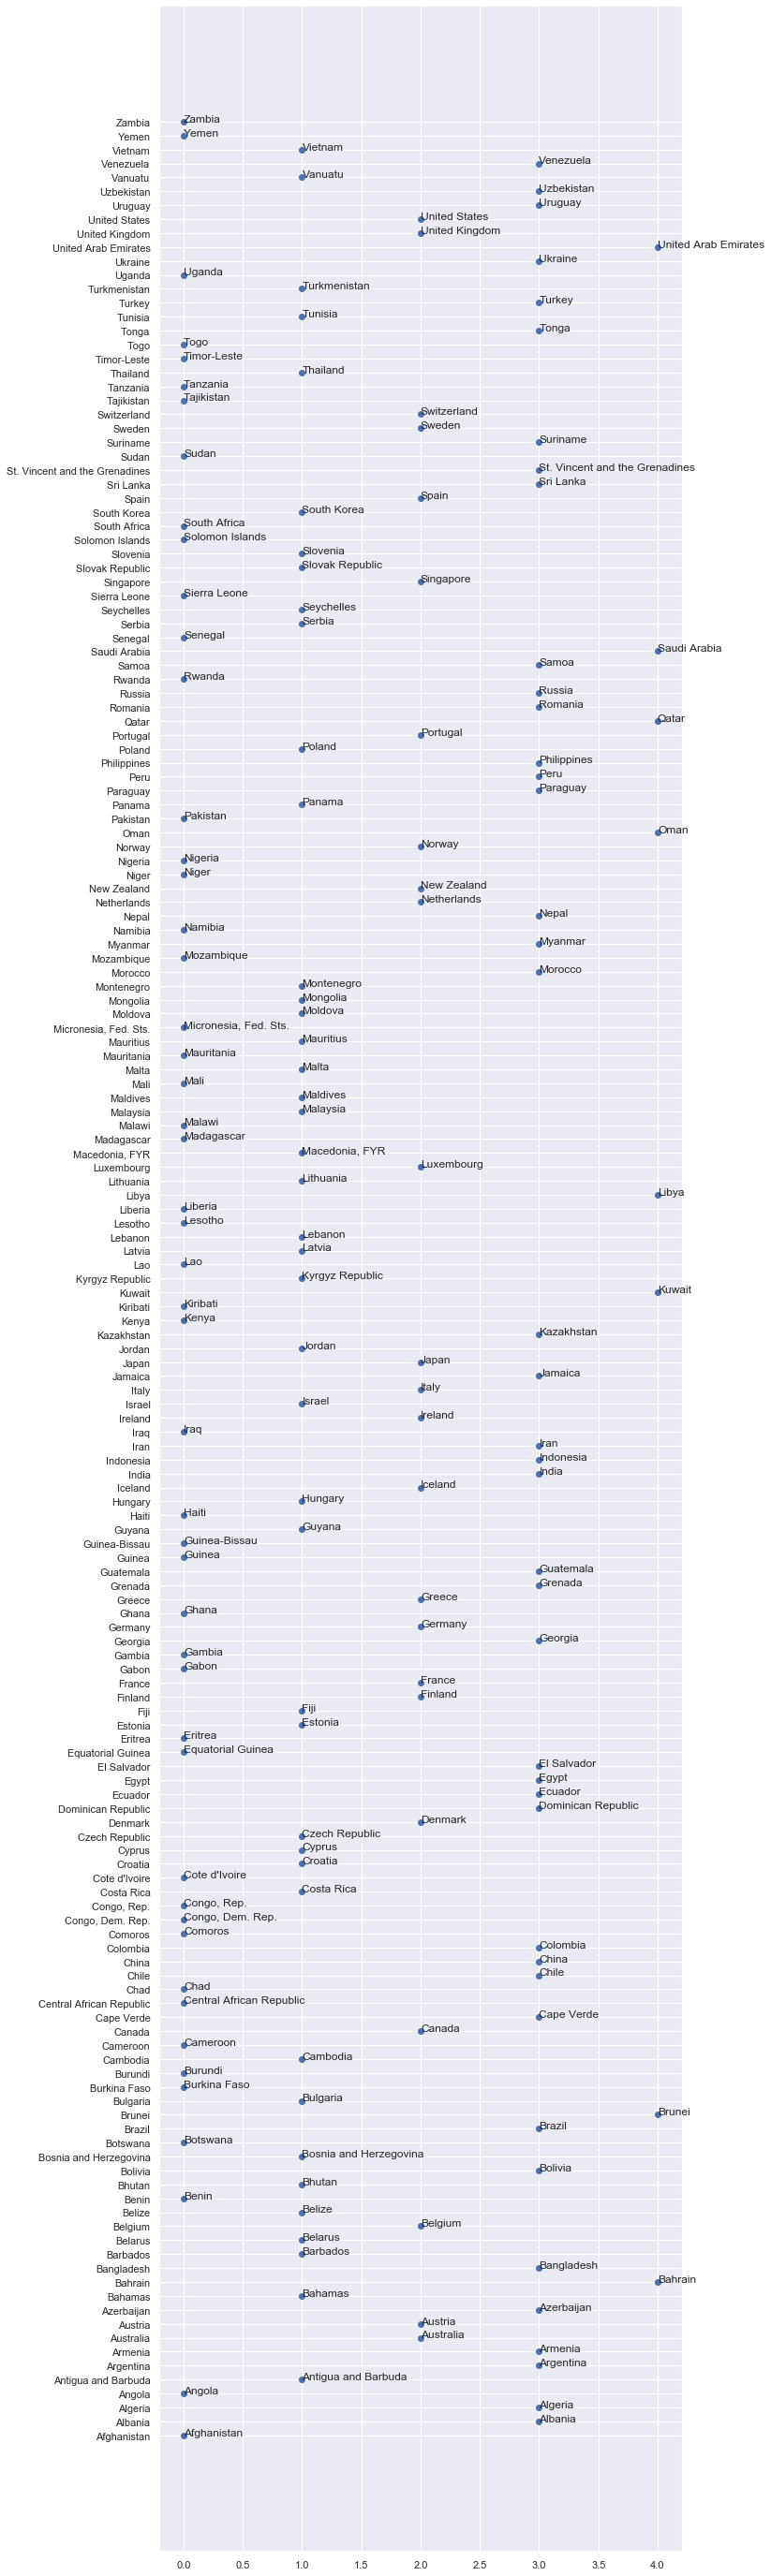

In [27]:
#plot five clusters of countries predicted from hierarchical algorithm
fig, ax = plt.subplots(figsize = (10,50))
ax.scatter(pred_hier,y)
for i, txt in enumerate(y):
    ax.annotate(txt,(pred_hier[i],y[i]))
plt.show()

In [28]:
#implement dataframe to view countries of cluster id =0 resulted from hierarchical clustering
df_hierarichy=pd.DataFrame({'Country':y,'ClusterID':pred_hier})
df_hierarichy[df_hierarichy['ClusterID']==0].iloc[:,0].values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan',
       'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

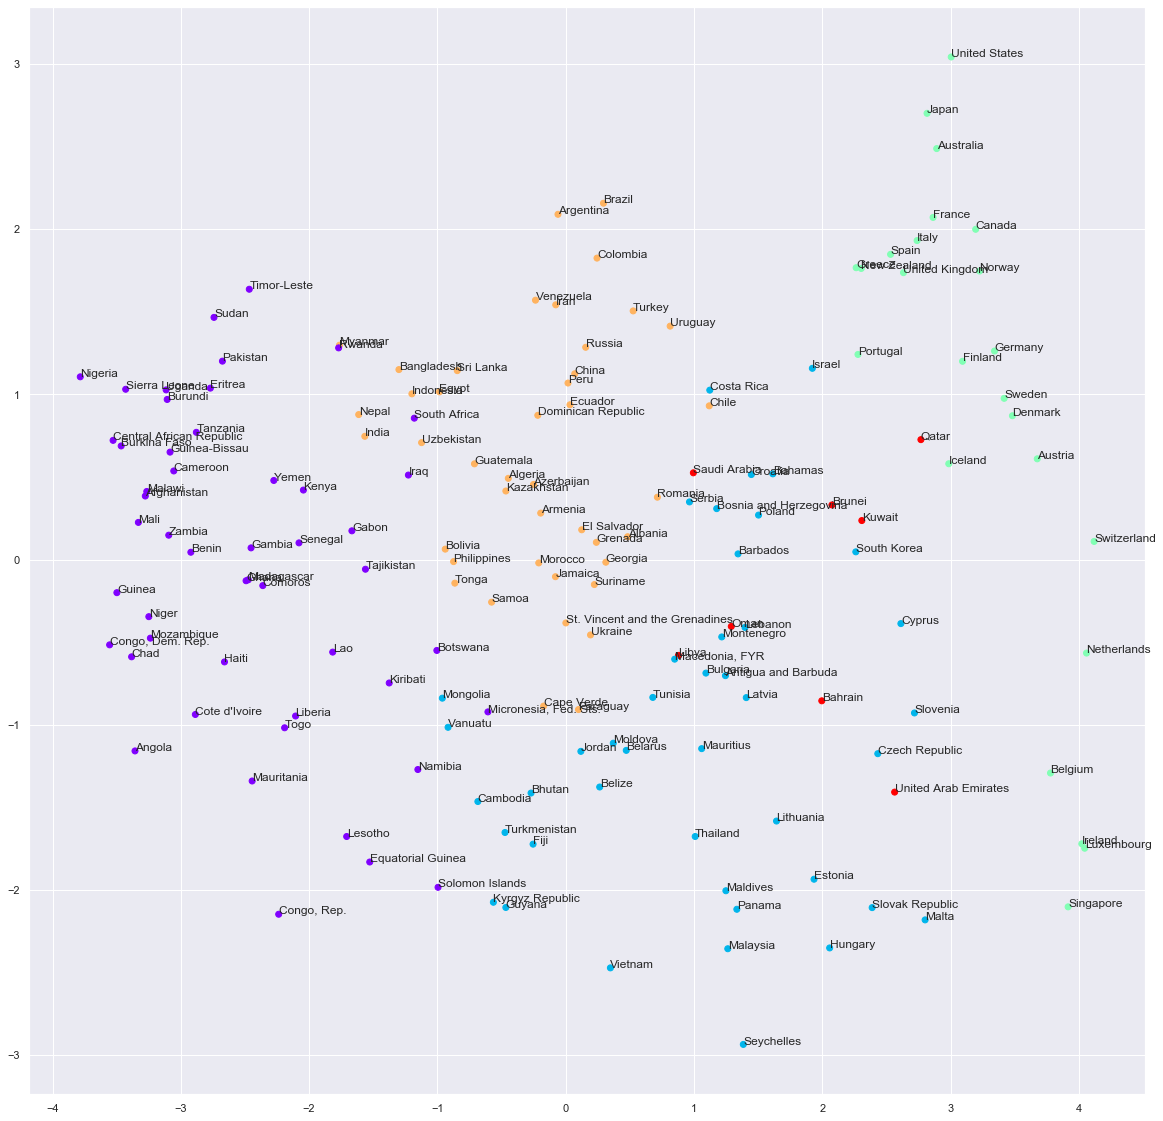

In [29]:
# implement dataframe to PCA components 1 &2 and countries and clusterid
#this dataframe used to plot countries clusters according to hierarchical clustering
Hier_df=pd.DataFrame({'Country':y,'pca1':PCA_components[0],'pca2':PCA_components[1],'ClusterID':pred_hier})
fig = plt.figure(figsize = (20,20))

plt.scatter(Hier_df['pca1'],Hier_df['pca2'],c=Hier_df['ClusterID'],cmap="rainbow")
for i, txt in enumerate(y):
    plt.annotate(txt, (Hier_df.iloc[i]['pca1'],Hier_df.iloc[i]['pca2']))
plt.show()

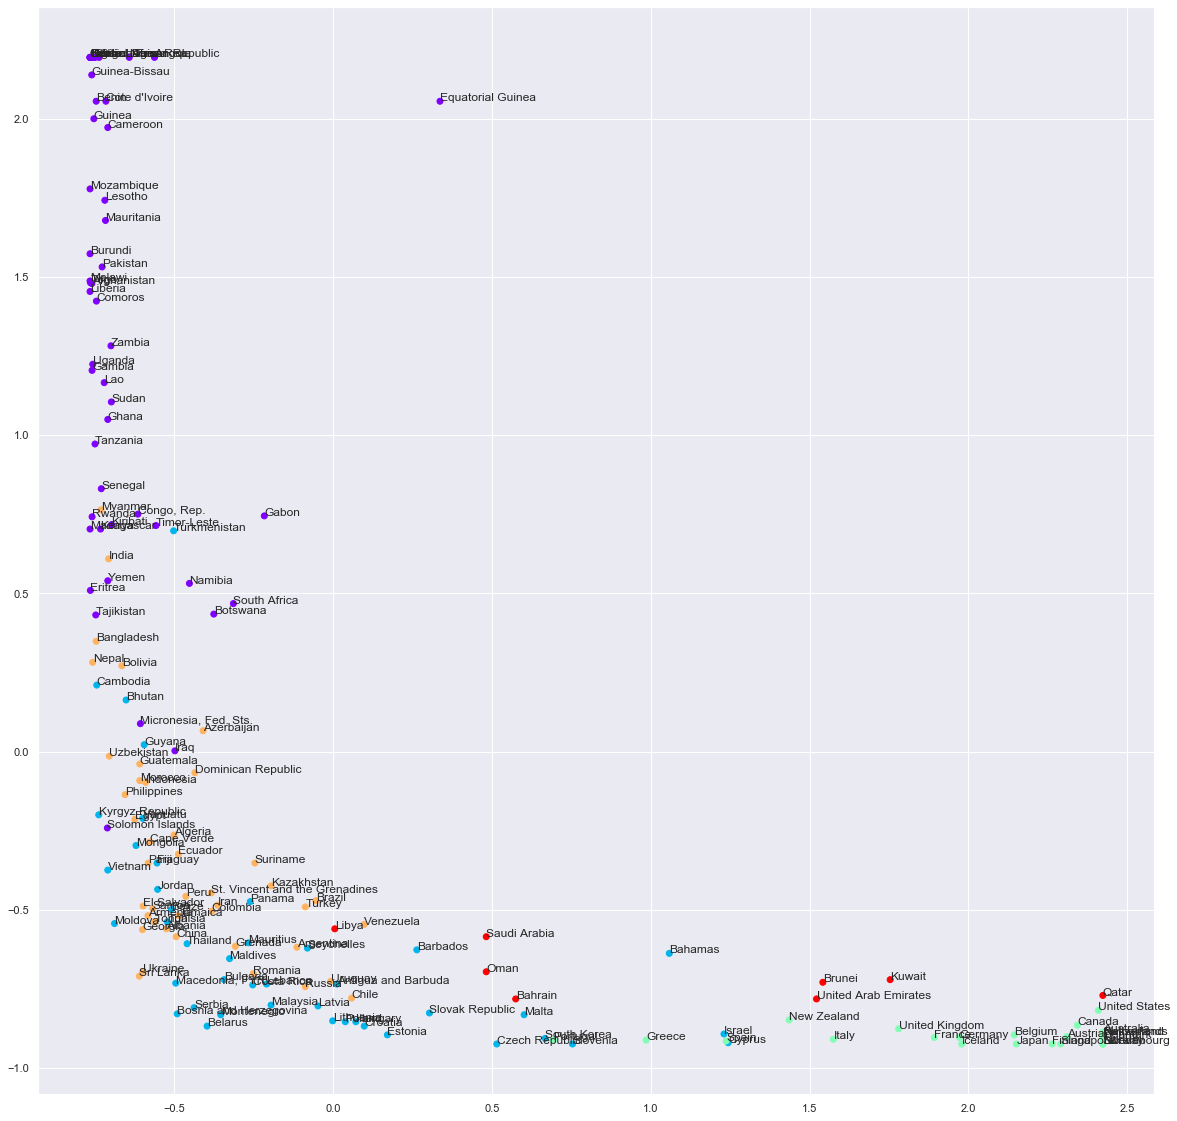

In [30]:
# implement dataframe to gdpp & child_mort and countries and hierarichical clusterid
#this dataframe used to plot countries clusters according to hierarchical clustering
# visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes
df_vs=pd.DataFrame({'Country':y,'gdpp':data['gdpp'],'child_mort':data['child_mort'],'ClusterID':pred_hier})
fig = plt.figure(figsize = (20,20))

plt.scatter(df_vs['gdpp'],df_vs['child_mort'],c=df_vs['ClusterID'],cmap="rainbow")
for i, txt in enumerate(y):
    plt.annotate(txt, (df_vs.iloc[i]['gdpp'],df_vs.iloc[i]['child_mort']))
plt.show()

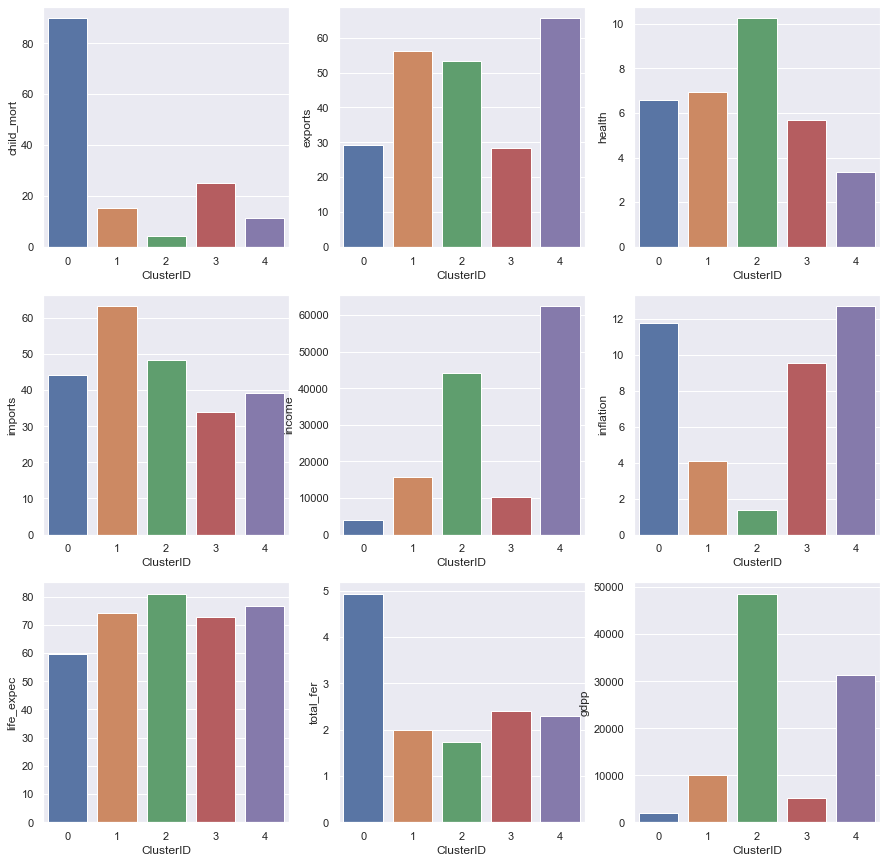

In [31]:
# analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] 
clusters_df=pd.DataFrame({'ClusterID':pred_hier})
#concat data to cluster ids predicted from hierarchical clustering
all_data=pd.concat([raw_data,clusters_df],axis=1)
#drop country column
all_data=all_data.drop('country',axis=1)
#compute the mean of all columns group by clusterid
all_data=all_data.groupby('ClusterID').mean()
#form a data frame of cluster ids 
groups_df=pd.DataFrame({'ClusterID':list(all_data.groupby('ClusterID').groups.keys())})
#concat dataframe of groups ids and means of columns
graph_df=pd.concat([groups_df,all_data],axis=1)
#plot each attribute with respect to each cluster
fig, axs = plt.subplots(3,3,figsize = (15,15))
i=0
j=0
for (col_name, col_val) in graph_df.iteritems():
    if(col_name !="ClusterID"):
        plt1 = sns.barplot(x='ClusterID', y=col_name, data= graph_df, ax = axs[i,j])
        plt1.set(xlabel = 'ClusterID', ylabel= col_name)
        if(j==2):
            i=i+1
            j=0
        else:
            j=j+1
        